In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('traino//')
classes = {'cat':0, 'dog':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'traino/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

0    12500
1    12500
Name: count, dtype: int64

In [7]:
X.shape, X_updated.shape

((25000, 200, 200), (25000, 40000))

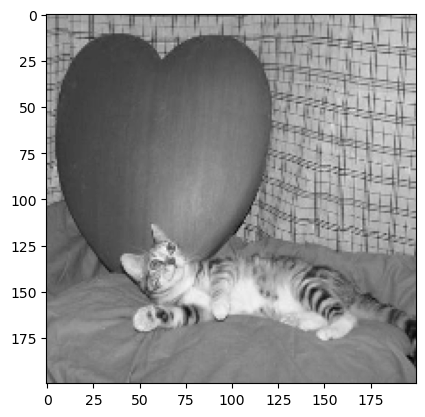

In [8]:
plt.imshow(X[52], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(25000, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((20000, 40000), (5000, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(20000, 40000) (5000, 40000)


In [15]:
print(pca_train.shape, pca_test.shape)


(20000, 40000) (5000, 40000)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [ ]:
X_train = my_pipeline.fit_transform(xtrain)


In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

In [ ]:
pred = sv.predict(xtest)
np.where(ytest != pred)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[610],ytest[610])

In [ ]:
dec = {0:'Cat', 1:'Dog'}

In [ ]:
pred=pd.DataFrame(pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','label']
datasets.to_csv('sample_submission.csv',index=False)